# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations. There are some missing values in the data.

#### Question 2. Create a summary table

In [10]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores have a higher nominal value, i.e. they go from 220 to 800, while GPA lies between 2.26 and 4.0. Higher nominal values will usually lead to a larger standard deviation.

#### Question 4. Drop data points with missing data


In [11]:
df_raw2 = df_raw.dropna(axis=0)
df_raw2.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The .count() method shows that the number of observations has declined from 400 to 397. All the variables have 397 values indicating that observations with any N/A values have been removed.

#### Question 6. Create box plots for GRE and GPA

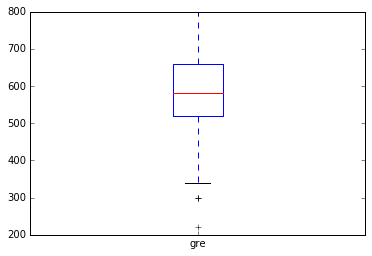

In [13]:
#boxplot 1
df_raw2['gre'].plot(kind='box')

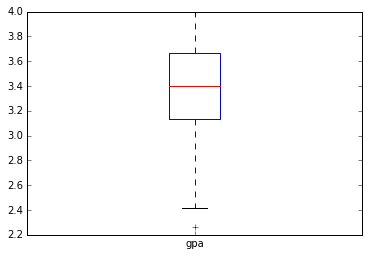

In [15]:
#boxplot 2
df_raw2['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The GRE boxplot shows that GRE values range from approximately 330 to 800. The middle 50% of the GRE scores lie between approx. 510 and 670.
The GPA boxplot shows that, while GPAs lie between 2.4 and 4.0, the middle 50% of GPAs lie in the 3.1 to 3.7 range approximately.

#### Question 8. Describe each distribution 

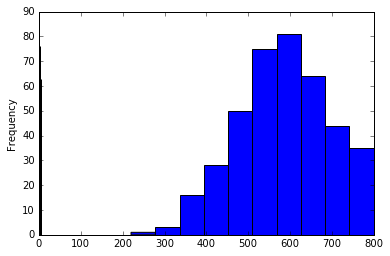

In [17]:
# plot the distribution of each variable 
df_raw2['gre'].plot(kind='hist')

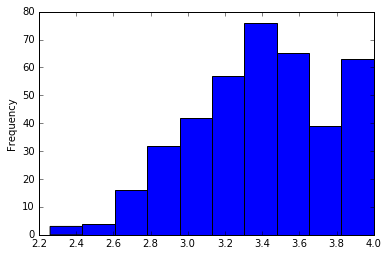

In [18]:
df_raw2['gpa'].plot(kind='hist')

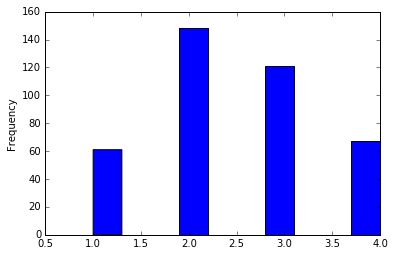

In [19]:
df_raw2['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Strictly speaking, we do not meet that requirement. The GRE and GPA histograms are truncated on the upside, and therefore skewed. The prestige histogram has discrete values and it is not a continuous variable. All three plots do not have the required bell shape.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The distribution needs a correction because our models (such as linear regression) assume that data has a normal distribution. We can try to normalize the data by transforming it, e.g. by taking the natural log of the raw values. In practice, the data are approximately normally distributed and we can work with it.

#### Question 11. Which of our variables are potentially colinear? 

In [24]:
# create a correlation matrix for the data
df_raw2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE scores are potentially colinear as they have a correlation of 0.38. It makes sense that students with high GPAs also have high GRE scores as they are probably smarter or have a better work ethich that makes them do well in tests.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We can explore this relationship by running a linear regression where the dependent variable is admission (binary variable) and independent variable is the presitige score. A better method would be to run logistic regression which we will learn in the next few classes.

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is that students coming from a presitigious college have better odds of getting admission. The data most likely will not support this hypothesis as indicated by the negative correlation between the admit and prestige variables.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: One alternative to dropping observations is to replace them with the mean or median for that variable.

#### 2. Bonus: Log transform the skewed data

,admit,gre,gpa,prestige
0,-inf,5.940171,1.283708,1.098612
1,0.000000,6.492240,1.300192,1.098612
2,0.000000,6.684612,1.386294,0.000000
3,0.000000,6.461468,1.160021,1.386294
4,-inf,6.253829,1.075002,1.386294


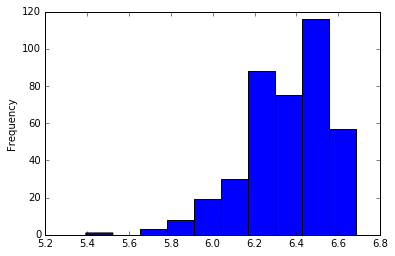

In [31]:
df_raw3 = df_raw2.apply(np.log)
df_raw3['gre'].plot(kind='hist')
df_raw3.head()

#### 3. Advanced: Impute missing data

In [29]:
df_raw2.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
